<a href="https://colab.research.google.com/github/dianakang/DIANA_TimeSeries/blob/master/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%85%98%5D_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **수요 예측(Forecast)**
  *   **정성적 기법**

  : 개인의 지혜나 주관을 바탕으로 예측하는 것

  : 시장조사법 / 델파이방법 / 비교유추법 
  *   **정성적 기법**

  : 데이터가 확보되어 있을 때 사용하는 기법 (객관성)

  : 시계열모형 / 인과모형 / 성장 곡선 모형




# **1. 시계열 분석(Time Series)**

: 수요량, 판매량, 주가 등 시간에 따른 변화를 예측하는 모델

: 시간에 따른 하나의 연속형 데이터(y)의 추세(trend)를 추적하는 기법

-> '시간' 데이터가 반드시 들어간다.

*   Lag : 특정 간격을 갖는 시간

*   Trend : 추세

*   Seasonality : 계절성

*   Cycle : 주기

*   Noise : 잡음 / 독립적인 데이터 

  -> whitenoise(분석가능한 잡음)

---


통계적으로 기술이 가능한 데이터, 즉 whitenoise 범주안에 드는 데이터를 분석하는 것을 시계열 분석이라고 한다. 이러한 시계열 데이터를 분석을 할 때 가장 많이 사용되는 방법은 ARIMA 모델을 사용하는 것이다.
 

## **1.1. 일변량 정상 시계열(ARIMA)**

In [12]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/Timeseries/Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트




*   고객의 '구매금액' 예측하기


In [5]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [6]:
# '구매일' 자료형을 날짜 형태로 바꾸기 - datetime 메서드 이용
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [7]:
# 자료형 확인
df1['Datetime'].describe()

## Series는 info() 메서드 적용 x , 따라서 describe()로 형태 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

-> top, first, last의 형태를 봤을 때 날짜 + 시간 형태(datetime)로 잘 적혀있음을 알 수 있다.

In [8]:
# 날짜 데이터 추출하기
df1['Year'] = df1['Datetime'].dt.year        # 년
df1['Month'] = df1['Datetime'].dt.month      # 달
df1['Week'] = df1['Datetime'].dt.week        # 주
df1['Day_of_week'] = df1['Datetime'].dt.day_name()  ## 요일

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [9]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


In [10]:
# pivot_table() - ('행과 열의 위치 바꿔 정리') => '일별 구매금액 합 구하기'
p1 = pd.pivot_table(data=df1, 
               index = 'Datetime', 
               values='구매금액', 
               aggfunc='sum').reset_index()

## index = 행 위치에 들어갈 열 / columns = 열 위치에 들어갈 열 / values = 데이터로 사용할 열 / aggfunc = 데이터 집계함수 / reset_index() = 데이터프레임의 인덱스 재정의 함수

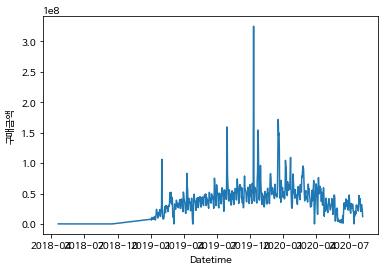

In [11]:
# 일별 구매금액 합 라인플롯 그리기
sns.lineplot(data=p1, x='Datetime', y='구매금액')

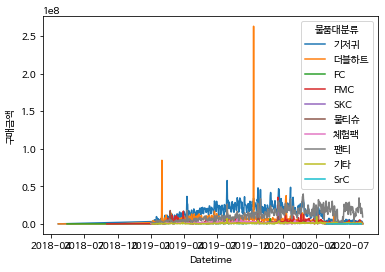

In [12]:
# 일별 + 물품별 구매금액 합 라인플롯 생성하기
p2 = pd.pivot_table(data=df1,
                    index=['Datetime','물품대분류'],
                     values='구매금액', aggfunc='sum').reset_index()

sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류') ## hue = 카테고리 변수 분류

이렇게 시각화를 해놓고보면 엄청난 whitenoise를 잘 찾아낼 수 있다. 여기서 whitenoise는 데이터가 엄청나게 튀는 더블하트이다. 

더블하트가 다른 품목에 비해 데이터가 튄 이유는 뭔가 일반적이지 않은 특수한 요인이 있었을 것이다. (ex. 재고를 엄청 많이 풀었다든지, 엄청 큰 세일이벤트를 했다던지 등..)

시계열 분석을 할 때 이런 데이터는 제거를 하거나 따로 빼놓고 다시 분석을 해야한다.

In [13]:
# 기저귀 데이터만 빼서 데이터 확인하기
cond1 = df1['물품대분류']=='기저귀'
df1.loc[cond1]

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


-> 데이터를 확인하면 2018년 데이터는 하나 밖에 없다. 이런 데이터는 분석에서 유의미한 결과를 도출해낼 수 없으므로 제거하도록 한다.

In [15]:
# 2018년 데이터 제거 = 첫번째 행 제거
cond1 = df1['물품대분류']=='기저귀'
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday




*   **ARIMA(Auto Regressive Intergrated Moving Average Model)**

  *   **AR(Auto Regressive Model) - 자기회귀모델**

      : p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 회귀모델 / ex) 주식

      : ACF(자기상관함수) - 특정 구간 내 데이터간 상관관계

      : PACF(부분자기상관함수)

  *   **MA(Moving Average Model) - 이동평균모델**

      : 일정한 구간 데이터의 평균을 계산해 미래를 예측하는 모델

  *   **Difference - 차분**

      : 사실상 실무에서 사용하는 데이터는 Lag 데이터(일정한 시간(텀)을 갖는 데이터)가 아니기 때문에 이러한 데이터를 정상적으로 변환시켜야 한다. 이러한 작업을 차분이라고 한다.

    -> AR모델만 사용하면 whitenoise 문제를 해결할 수 없기 때문에 MA모델도 함께 사용한다. MA모델은 불규칙적인 변동을 제거해줄 수 있다.

---






*   **ARIMA 모델을 사용하기 위한 조건**

  - 단기예측 O (장기예측엔 적합하지 않음)

  - 계절적 변동요인(주기적 변동)이 있는 경우

  - Sample size가 충분한 경우 (Sample > 50)

  - 정상성(일정한 트렌드)을 띄는 자료 -> 만약 평균이나 분산이 증가/감소하는 경우에는 '차분'을 사용해야한다.



In [16]:
# ARIMA 모델 라이브러리 불러오기
import statsmodels.tsa.api as tsa

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# 기저귀 데이터 살펴보기
df2

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


In [18]:
# 시계열 데이터프레임 만들기 <- pivot_table 메서드 사용하여 행과 열의 위치 정리
df_time = pd.pivot_table(data=df2, index='Datetime', 
                         values='구매금액', aggfunc='sum')
df_time
## index = 행 위치에 들어갈 열 / values = 데이터로 사용할 열 / aggfunc = 데이터 집계함수 

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


-> 일별 구매금액의 합이 순차적으로 정리되어 나오고 있음을 확인할 수 있음.

---



*   시계열 데이터프레임의 특징

: 위의 데이터프레임을 통해 알 수 있듯이 보통 시간(날짜) 데이터를 인덱스(x값)로 두고, 하나의 피처를 y값으로 둔다.

: 즉 **datetime을** 피처가 아닌, **인덱스로 넣어줘야한다!**



In [19]:
# 데이터프레임 형태가 이렇게 되어 있으면 안된다. 
df_time2 = pd.pivot_table(data=df2, index='Datetime', 
                         values='구매금액', aggfunc='sum').reset_index()
df_time2

,Datetime,구매금액
0,2019-01-01,3051240
1,2019-01-02,2556280
2,2019-01-03,2729480
3,2019-01-04,2238440
4,2019-01-05,2478680
...,...,...
573,2020-08-03,3075900
574,2020-08-04,4010200
575,2020-08-05,2937800
576,2020-08-06,2647000


-> 인덱스가 이렇게 0,1,2,3...(RangeIndex)의 형태가 되면 안된다. 

In [20]:
# 인덱스를 이렇게 datetime 형태로 바꿔줘야한다.
df_time2 = pd.pivot_table(data=df2, index='Datetime', 
                         values='구매금액', aggfunc='sum').reset_index()
df_time2.set_index('Datetime')

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [35]:
# 일일 단위의 평균금액 계산하기 
y = df_time['구매금액'].resample('1D').mean()  ## resample() - 시간 단위 구간 설정
y

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [36]:
# 결측값 개수 확인
y.isnull().sum()

7

만약 결측값이 있다면, 시계열 분석에서는 결측값을 다음과 같이 지정해준다.

In [37]:
# 결측값이 있는 경우, 다음과 같이 지정해준다.
y1 = day_amount.fillna(method='ffill')
y1

## 시계열 데이터의 결측값을 채워주기 위해서는 method = 'bfill' -> 이후 값으로 누락값 변경
##                                  method = 'ffill' -> 이전 값으로 누락값 변경

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [38]:
# 그래프 크기 설정
from pylab import rcParams 

rcParams['figure.figsize']= 15,10

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


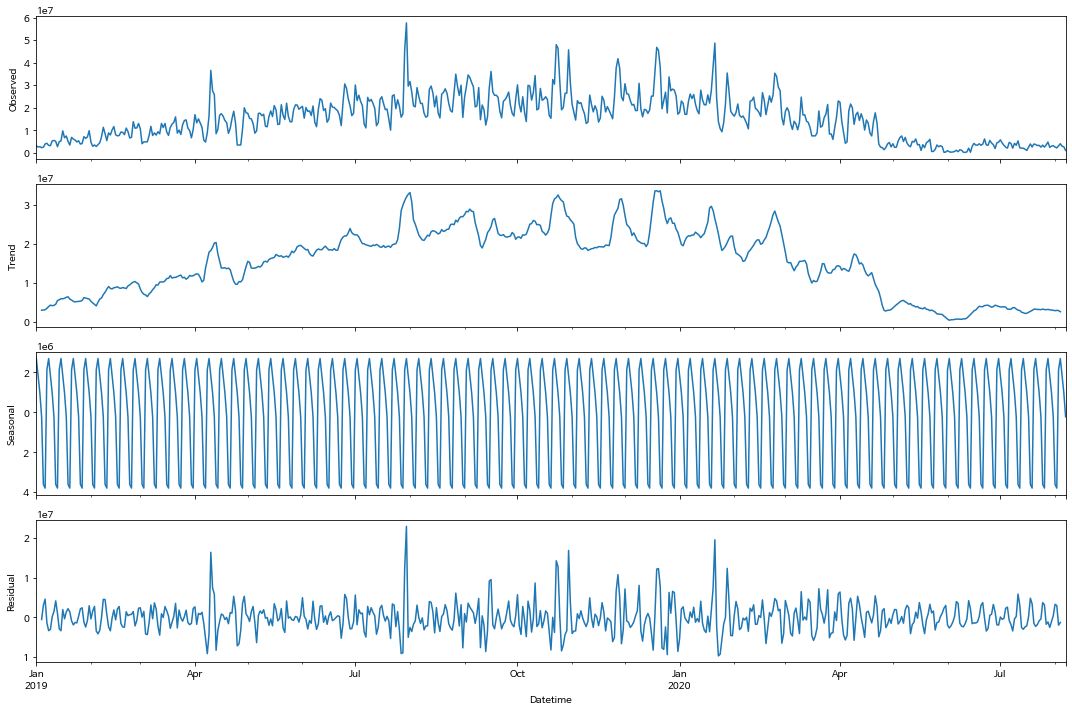

In [39]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(day_amount1, model='additive')  ## seasonal_decompose() = 시계열 분해
                                                                     ## : Trend, Seasonality, Cycle/Resdiual(잔차, 즉 변동) 

# 모델 시각화
fig = model_series.plot()
plt.show()



*   **시계열 분해**
  *   Trend(추세요인)
  *   Seasonality(계절요인)
  *   Resdiual(불규칙 또는 순환요인) 

  -> 시각화를 통해 이것들을 살펴봐야한다! 


In [40]:
import itertools

In [41]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))   # p = 며칠 전의 자료가 영향을 주는지 /  d = 차분  / 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [42]:
# ARIMA 모델의 파라미터 - 3가지
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [43]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [44]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [47]:
# ARIMA 모델 중 가장 성능이 좋은 Parameter 찾기
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910
23,"(0, 1, 0)","(1, 1, 1, 12)",19009.286110
63,"(1, 1, 1)","(1, 1, 1, 12)",19011.472166
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967429
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",20243.619505
12,"(0, 0, 1)","(1, 0, 0, 12)",20256.568197
1,"(0, 0, 0)","(0, 0, 1, 12)",20486.120636
8,"(0, 0, 1)","(0, 0, 0, 12)",20744.606738


-> AIC 값이 낮을수록 변동이 없고 정확하다!

In [48]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.767      0.000       0.516       0.663
ma.L1          0.2723      0.045      6.096      0.000       0.185       0.360
ar.S.L12       0.9777      0.011     86.924      0.000       0.956       1.000
ma.S.L12      -0.7739      0.038    -20.540      0.000      -0.848      -0.700
sigma2      2.882e+13   3.25e-16   8.86e+28      0.000    2.88e+13    2.88e+13
